<a href="https://colab.research.google.com/github/DaverArenas/procesamientoSe-alesInteligenciaArtificial/blob/main/Clase6E2_30_09_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis de componentes principales 

Es una técnica de reducción de dimensionalidad lineal que se puede utilizar para extraer información de un espacio de alta dimensión proyectándola en un subespacio de dimensión inferior. **Intenta preservar las partes esenciales que tienen más variación de los datos y eliminar las partes no esenciales con menos variación.**

Esta eliminación de dimensionalidad se puede aprovechar para acelerar el tiempo de entrenamiento y prueba del algoritmos de ML.
Los componentes principales son una línea recta y el primer componente principal tiene la mayor variación en los datos. Cada componente principal subsiguiente es ortogonal al último y tiene una variación menor.

La razón por la que se obtienen componentes principales no correlacionados de las características originales es que las características correlacionadas contribuyen al mismo componente principal, reduciendo así las características de datos originales en componentes principales no correlacionados; cada uno representando un conjunto diferente de características correlacionadas con diferentes cantidades de variación.

https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

# Matriz de características 

Lo primero que debemos hacer para reducir la dimensionalidad de la señal, es obtener su matriz de características. 

Son de gran utilidad para reducir el numero de caracteristicas de las señales y generar la relaciones entre ellas. 
Para extraer las caracteristicas de la señal vamos a utilizar la librería 

```
TSFEL - Time Series Feature Extraction
```
Las características que podemos extraer se pueden diferenciar entre características estadísticas, temporales y frecuenciales, como: 
- Energía 
- AUC (área bajo la curva)
- Autocorrelación de la señal 
- Calculo de minímos, máximo, media, mediana, desviación estándar.
- Media de los coeficientes FFT 
- La descomposición de las ondas wavelet
- etc...
https://tsfel.readthedocs.io/en/latest/descriptions/get_started.html


Librería a utilizar
```
import  tsfel 
```
Archivo de configuración para la extraccion de características
```
cfg  =  tsfel.get_features_by_domain ()
X  =  tsfel.time_series_features_extractor (cfg , xTrain, fs =300)
```
Guardar en CSV 
```
X.to_csv("Caracteristicas.csv")
```


En este ejercicio utilizaremos la BD para reconocer las diferentes actividades de la vida diaria de [Human Activity Recognition Using Smartphones data set](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones)

Este experimnto se llevó a cabo en un grupo de 30 vonluntarios, donde cada uno realizaba 6 actividades, Caminar, caminar escalas arriba, caminar escalas abajo, sentarse, estar de pie y acostado, todo eto se registraba en un celular (con acelerometro y giroscopio) ubicado en la cintura. 

Estas señales cuentan con un preprocesamiento en el cual se le aplicaron filtros de ruido y luego muestreadas suvizadas con un filtro de media movil. 
En particular la señal de aceleración del sensor, que tiene componentes de movimiento gravitacional y corporal, se separó utilizando un filtro de paso bajo Butterworth en la aceleración del cuerpo y la gravedad. Se supone que la fuerza gravitacional solo tiene componentes de baja frecuencia, por lo que se utilizó un filtro con una frecuencia de corte de 0,3 Hz. 

En el siguiente link pueden visualizar como se llevó a cabo el experimento: [Experimento](https://www.youtube.com/watch?v=XOEN9W05_4A)

In [1]:
import warnings
warnings.filterwarnings('ignore')
!pip install tsfel >/dev/null 2>&1
from sys import platform
if platform == "linux" or platform == "linux2":
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip >/dev/null 2>&1
else:
    !pip install wget >/dev/null 2>&1
    import wget
    wget.download('http://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI HAR Dataset.zip')

In [2]:
# Import libraries
import tsfel
import glob
import zipfile

import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import confusion_matrix, accuracy_score
sns.set()

# Unzip dataset
zip_ref = zipfile.ZipFile("UCI HAR Dataset.zip", 'r')
zip_ref.extractall()
zip_ref.close()

# Cargar Dataset


In [3]:
x_train_sig = np.loadtxt('UCI HAR Dataset/train/Inertial Signals/total_acc_x_train.txt', dtype='float32')
x_test_sig = np.loadtxt('UCI HAR Dataset/test/Inertial Signals/total_acc_x_test.txt', dtype='float32')
y_test = np.loadtxt('UCI HAR Dataset/test/y_test.txt')
y_train = np.loadtxt('UCI HAR Dataset/train/y_train.txt')
activity_labels = np.array(pd.read_csv('UCI HAR Dataset/activity_labels.txt', header=None, delimiter=' '))[:,1]
# Frecuencia de muestreo 
fs = 100

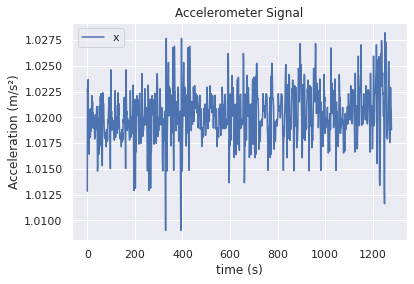

In [4]:
%matplotlib inline

plt.figure()
plt_size = 10
plt.plot(np.concatenate(x_train_sig[0:plt_size],axis=0))
plt.xlabel("time (s)")
plt.ylabel("Acceleration (m/s²)")
plt.title("Accelerometer Signal")
plt.legend('x axis')
plt.show()

# Extracción de características

Ahora vamos a extraer las características de las señales de test y train y las vamos a almacenar en un CSV. Esta parte **NO LA VAMOS A EJECUTAR VAMOS A UTILIZAR LOS ARCHIVOS FeatureTrain.csv y FeatureTest.csv**. 


La configuración para la extracción de características se pude generar a partir de los dominios 


```

cfg_file = tsfel.get_features_by_domain()               # All features will be extracted.
cgf_file = tsfel.get_features_by_domain("statistical")  # All statistical domain features will be extracted
cgf_file = tsfel.get_features_by_domain("temporal")     # All temporal domain features will be extracted
cgf_file = tsfel.get_features_by_domain("spectral")     # All spectral domain features will be extracted
```





In [ ]:
cfg_file =  tsfel.get_features_by_domain ()

In [ ]:
# Extract excel info
train  =  tsfel.time_series_features_extractor (cfg_file , x_train_sig, fs =fs)
test  =  tsfel.time_series_features_extractor (cfg_file , x_test_sig, fs =fs)

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


In [ ]:
train.to_csv('FeatureTrain.csv')
test.to_csv('FeatureTest.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [7]:
train = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/Clase_6/FeatureTrain.csv')
test = pd.read_csv('/content/drive/MyDrive/Especializacion BigData EIA/Procesamiento_Señales/Clase_6/FeatureTest.csv')

# Selección de características

Se debe tener en cuenta que las características que son similares posiblemente no nos daran información relevante que permita diferencias los diferentes tipos de señales, por lo tanto podemos eliminar aquellas características con correlaciones altas, también aquellas que no presenten altas variaciones y por ultimo es importante normalizar la información. 

In [8]:
train.shape

(7352, 200)

In [9]:
test.shape

(2947, 200)

In [10]:
# Se eliminan las características con correlaciones altas
corr_features = tsfel.correlated_features(train)
train.drop(corr_features, axis=1, inplace=True)
test.drop(corr_features, axis=1, inplace=True)

In [11]:
corr_features

['0_Area under the curve',
 '0_Autocorrelation',
 '0_ECDF Percentile Count_1',
 '0_ECDF Percentile_1',
 '0_LPCC_12',
 '0_LPCC_2',
 '0_LPCC_3',
 '0_LPCC_7',
 '0_LPCC_8',
 '0_LPCC_9',
 '0_Mean',
 '0_Mean absolute deviation',
 '0_Mean absolute diff',
 '0_Median',
 '0_Median absolute deviation',
 '0_Median absolute diff',
 '0_Peak to peak distance',
 '0_Positive turning points',
 '0_Root mean square',
 '0_Spectral centroid',
 '0_Spectral roll-off',
 '0_Spectral skewness',
 '0_Spectral slope',
 '0_Spectral spread',
 '0_Standard deviation',
 '0_Sum absolute diff',
 '0_Total energy',
 '0_Variance',
 '0_Wavelet absolute mean_1',
 '0_Wavelet absolute mean_2',
 '0_Wavelet absolute mean_3',
 '0_Wavelet absolute mean_4',
 '0_Wavelet absolute mean_5',
 '0_Wavelet absolute mean_6',
 '0_Wavelet absolute mean_7',
 '0_Wavelet absolute mean_8',
 '0_Wavelet energy_1',
 '0_Wavelet energy_2',
 '0_Wavelet energy_3',
 '0_Wavelet energy_4',
 '0_Wavelet energy_5',
 '0_Wavelet energy_6',
 '0_Wavelet energy_7',


In [12]:
# Se eliminan las características con varianzas bajas 
selector = VarianceThreshold()
train = selector.fit_transform(train)
test = selector.transform(test)


In [13]:
# Se normalizan las características
scaler = preprocessing.StandardScaler()
nX_train = scaler.fit_transform(train)
nX_test = scaler.transform(test)

Con las señales transformadas a matrices de características y después de seleccionar las más relevantes vamos a realizar una clasificación utilizando un `RandomForest`

In [14]:
classifier = RandomForestClassifier()
classifier.fit(nX_train, y_train.ravel())

y_test_predict = classifier.predict(nX_test)

accuracy = accuracy_score(y_test, y_test_predict) * 100
print(classification_report(y_test, y_test_predict, target_names=activity_labels))
print("Accuracy: " + str(accuracy) + '%')

                    precision    recall  f1-score   support

           WALKING       0.85      0.97      0.91       496
  WALKING_UPSTAIRS       0.82      0.84      0.83       471
WALKING_DOWNSTAIRS       0.92      0.75      0.82       420
           SITTING       0.78      0.47      0.59       491
          STANDING       0.65      0.88      0.74       532
            LAYING       1.00      1.00      1.00       537

          accuracy                           0.82      2947
         macro avg       0.84      0.82      0.82      2947
      weighted avg       0.83      0.82      0.82      2947

Accuracy: 82.3549372242959%


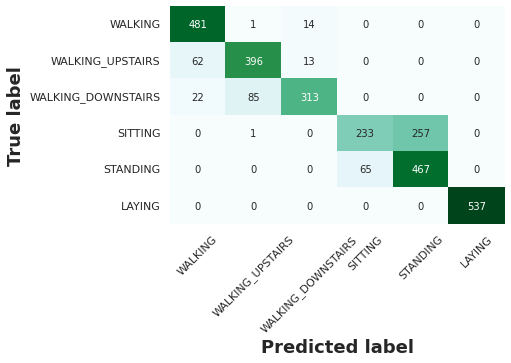

In [15]:
cm = confusion_matrix(y_test, y_test_predict)
df_cm = pd.DataFrame(cm, index=[i for i in activity_labels], columns=[i for i in activity_labels])
plt.figure()
ax= sns.heatmap(df_cm,  cbar=False, cmap="BuGn", annot=True, fmt="d")
plt.setp(ax.get_xticklabels(), rotation=45)

plt.ylabel('True label', fontweight='bold', fontsize = 18)
plt.xlabel('Predicted label', fontweight='bold', fontsize = 18)
bottom, top = ax.get_ylim()
plt.show()

# PCA

Posterior a la adquisción de la matriz con las características se puede realizar un **Análisis de componentes principales (PCA)** para así reducir la dimensionalidad.

Vamos a cargar nuevamente el dataset pero en este caso utilizando el dataset que se generó a partir de la extracción de características. 

Ahora vamos a seleccionar cuáles características son las más relevantes para el análisis. 

Extraemos una cantidad de componentes relevantes, los cuales se calculan a partir de  la descomposición de valores singulares de los datos. Es una operación matricial.

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022_II_signal_processing/Clase_6/FeatureTrain.csv')
test  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2022_II_signal_processing/Clase_6/FeatureTest.csv')

In [ ]:
pca = PCA(10)
pca_train = pca.fit_transform(train)
print('Variación por componentes principales: {}'.format(pca.explained_variance_ratio_))

Variación por componentes principales: [5.39526620e-01 4.52552917e-01 5.95382242e-03 2.64842164e-04
 2.44424058e-04 2.15277140e-04 2.05665857e-04 1.62875729e-04
 1.60246900e-04 1.40298313e-04]


In [ ]:
pca_train

array([[-3587.1050243 ,   794.85122788,   448.0056487 , ...,
          -46.52416409,   -19.75027038,     5.55767534],
       [-3587.28988773,   788.64376757,   507.21385112, ...,
          -43.77297001,   -17.20576264,     4.29908707],
       [-3589.69293772,   776.29332596,   306.3581238 , ...,
          -41.84906288,   -20.00515533,     5.64955273],
       ...,
       [ 3275.5685467 , -2171.45564287,  -153.79065354, ...,
           16.01587449,    41.0853227 ,    70.13225272],
       [ 3302.57511383, -2055.95253869,  -153.3162783 , ...,
           37.94586248,    -7.59575496,   -28.1547797 ],
       [ 3210.21414606, -2469.89713161,  -152.03426542, ...,
           19.39279946,    48.41754695,    66.64285064]])

In [ ]:
pca = PCA(10)
pca_test = pca.fit_transform(test)
print('Variación por componentes principales: {}'.format(pca.explained_variance_ratio_))

Variación por componentes principales: [8.27117972e-01 1.60186915e-01 9.14598992e-03 4.97982547e-04
 4.41727701e-04 3.84584731e-04 3.68624692e-04 3.54408791e-04
 2.77405849e-04 2.58338876e-04]


# ⛳ Tú turno! 

- Mejora la clasificación anterior, utilizando otro modelo de ML.

- Después selecciona la cantidad de componentes que consideres signicativos para la señal y según tus criterios contruye un modelo que permita clasificar las diferentes señales
